### 보고서 본문

*   본 보고서는 타이타닉 탑승객 정보를 기반으로 하여 쓰여진 보고서입니다.

*   먼저, 보고서의 예상 독자로는 각 항구별 안전담당관리자들로 상정하였습니다.

*   데이터의 시각화 목적은 해당 데이터셋에서 성별, 나이, 좌석등급 등에 초점을 맞추었던 기존의 분석에서 벗어나 기항지를 중점으로 생존여부를 분류해 봄으로써 선박안전에 대한 새로운 인사이트를 도출해내기 위함입니다. 

*   시각화를 위한 Tool로는 파이썬의 Matplotlib을 사용하였는데, 이는 데이터의 특성 분류 등을 익숙한 방식으로 해결할 수 있으며 복잡한 기능이 요구되는 시각화가 아니므로 단순한 그래프 구현에 적합하다고 판단하였기 때문입니다.

*   Plot 종류로는 Bar chart와 Pie chart를 이용하였는데 Embarked 변수가 연속형 변수가 아닌 한편, 다른 변수와의 상관관계를 분석하기 보다 생존여부를 기준으로 기항지별 비율을 드러내기 위함이므로 두 차트를 이용해 시각화를 진행하였기 때문입니다.

*   시각화의 결과로부터 도출할 수 있는 결론은 S 항구에서 출발한 사람의 비율이 생존자보다 희생자 분포에서 더 많이 나타난다는 것입니다. 

*   비율 뿐만 아니라 절대적인 숫자 또한 희생자 쪽에서 2배로 나타나는데 이는 C 항구에서 출발한 사람들의 경우와 반대되는 경향입니다.

*   때문에 이를 토대로 S 항구의 안전담당관리처에게 탑승하는 여객선 승객들에 대해 사고시 탈출요령 등 추가적인 안전교육을 진행할 것을 제안합니다.



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data set: kaggle <Titanic - Machine Learning from Disaster>
# https://www.kaggle.com/competitions/titanic/overview
df = pd.read_csv('/content/gdrive/MyDrive/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


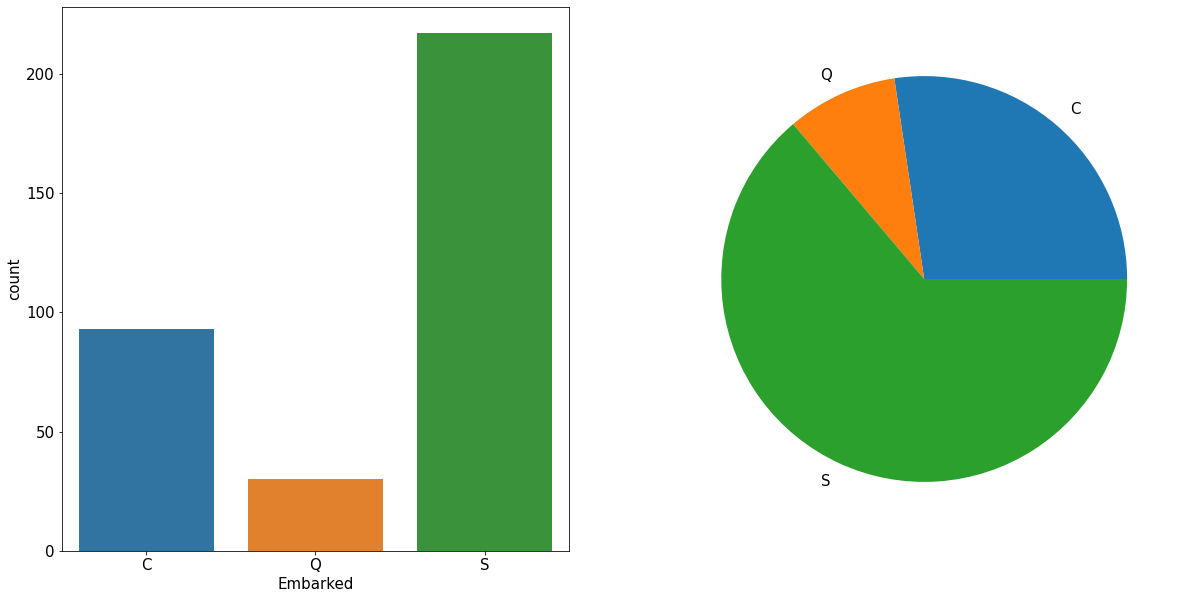

In [13]:
# Preprocessing
df_pie = df.copy()
plt.rc('font', family='NanumBarunGothic', size=15)
df_pie['count'] = 1
df_pie = df_pie[df_pie['Survived'] == 1]
df_pie = df_pie[['Embarked', 'count']].groupby('Embarked').agg(sum).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
plt.rc('font', family='NanumBarunGothic', size=15)

# Bar Chart
sns.barplot(data=df_pie, x='Embarked', y='count', ax=ax[0])

# Pie Chart
plt.pie(df_pie['count'], labels = df_pie['Embarked'])

plt.show()

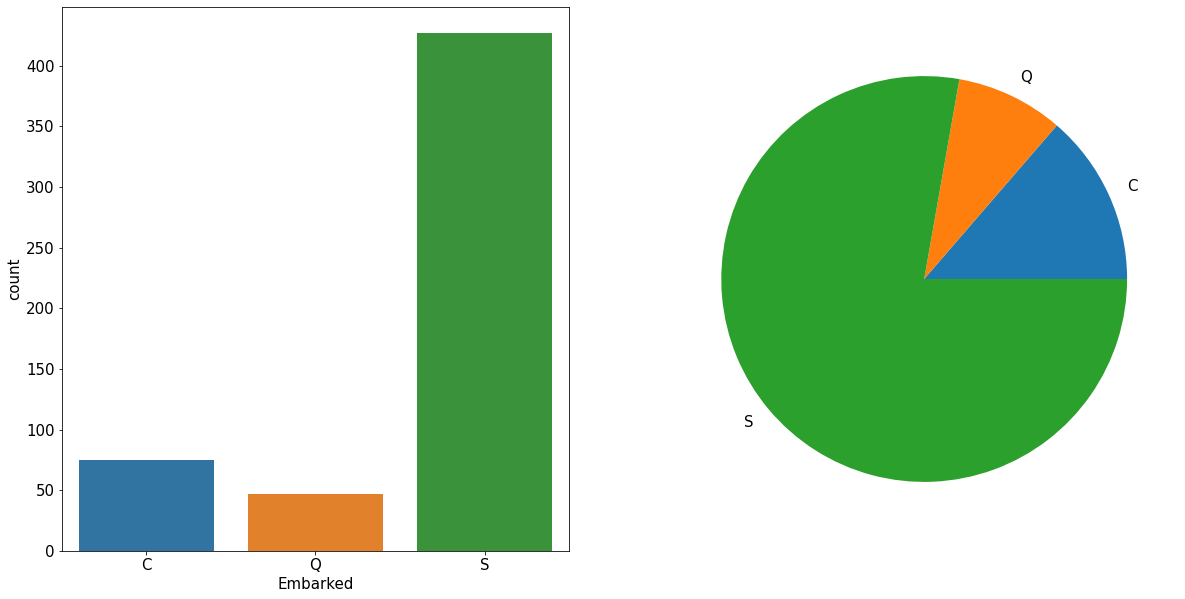

In [14]:
# Preprocessing
df_pie = df.copy()
plt.rc('font', family='NanumBarunGothic', size=15)
df_pie['count'] = 1
df_pie = df_pie[df_pie['Survived'] == 0]
df_pie = df_pie[['Embarked', 'count']].groupby('Embarked').agg(sum).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
plt.rc('font', family='NanumBarunGothic', size=15)

# Bar Chart
sns.barplot(data=df_pie, x='Embarked', y='count', ax=ax[0])

# Pie Chart
plt.pie(df_pie['count'], labels = df_pie['Embarked'])

plt.show()